# Comparing networks

In [1]:
import Pkg; Pkg.activate(".")
using EcologicalNetworks
using EcologicalNetworksPlots
using Plots

Activating environment at `~/EcoNetworksLabs/Project.toml`


┌ Info: Recompiling stale cache file /home/tpoisot/.julia/compiled/v1.2/EcologicalNetworksPlots/UMZhI.ji for EcologicalNetworksPlots [9f7a259d-73a7-556d-a7a2-3eb122d3865b]
└ @ Base loading.jl:1240


In [86]:
HP = convert.(BipartiteNetwork, web_of_life.("A_HP_0".*lpad.(1:51, 2, "0")))

51-element Array{BipartiteNetwork{Bool,String},1}:
 18×10 bipartite  ecological network (Bool, String) (L: 61) 
 24×18 bipartite  ecological network (Bool, String) (L: 96) 
 9×23 bipartite  ecological network (Bool, String) (L: 108) 
 21×6 bipartite  ecological network (Bool, String) (L: 52)  
 13×7 bipartite  ecological network (Bool, String) (L: 51)  
 37×16 bipartite  ecological network (Bool, String) (L: 123)
 17×8 bipartite  ecological network (Bool, String) (L: 43)  
 24×8 bipartite  ecological network (Bool, String) (L: 37)  
 22×14 bipartite  ecological network (Bool, String) (L: 97) 
 31×18 bipartite  ecological network (Bool, String) (L: 88) 
 19×4 bipartite  ecological network (Bool, String) (L: 43)  
 23×7 bipartite  ecological network (Bool, String) (L: 63)  
 22×11 bipartite  ecological network (Bool, String) (L: 103)
 ⋮                                                          
 18×8 bipartite  ecological network (Bool, String) (L: 28)  
 10×11 bipartite  ecological netwo

In [109]:
N1 = HP[1]
N2 = HP[14]

19×11 bipartite  ecological network (Bool, String) (L: 68)

In [110]:
metaweb = union(N1, N2)

32×17 bipartite  ecological network (Bool, String) (L: 121)

In [111]:
intersect(N1, N2)

5×4 bipartite  ecological network (Bool, String) (L: 8)

In [112]:
setdiff(N1, N2)

13×6 bipartite  ecological network (Bool, String) (L: 16)

In [113]:
I = initial(RandomInitialLayout, metaweb)
for step in 1:4000
  position!(ForceDirectedLayout(), I, metaweb)
end

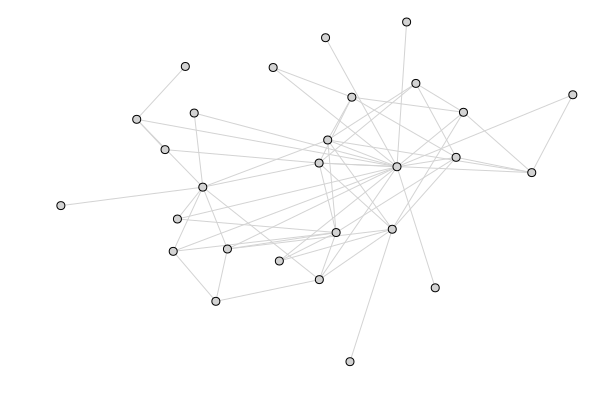

In [114]:
plot(I, N1, lc=:lightgrey)
scatter!(I, N1, mc=:lightgrey)

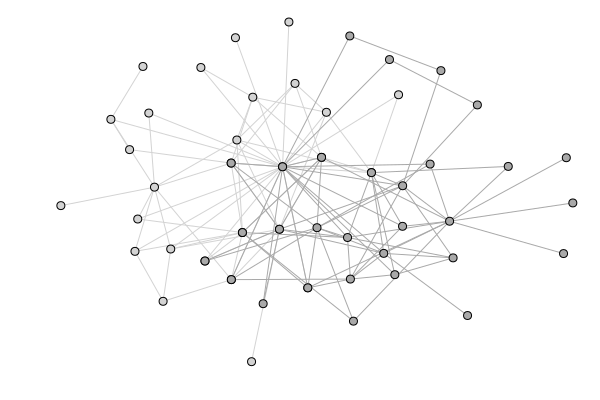

In [115]:
plot!(I, N2, lc=:darkgrey)
scatter!(I, N2, mc=:darkgrey)

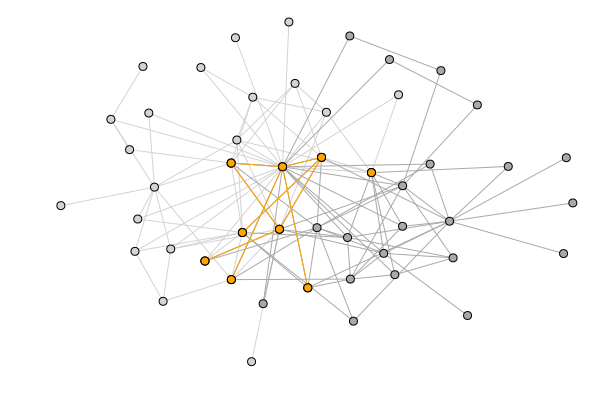

In [116]:
plot!(I, intersect(N1, N2), lc=:orange)
scatter!(I, intersect(N1, N2), mc=:orange)

In [117]:
βwn(N1, N2)

(a = 8, b = 60, c = 53)

In [118]:
βos(N1, N2)

(a = 8, b = 7, c = 1)

In [119]:
βs(N1, N2)

(a = 9, b = 21, c = 19)

In [120]:
KGL02(βos(N1, N2))

0.33333333333333326